# Manuelidis Transmissible Spongiform Encephalopathies Collaboration
### Research Bioinformatics Group Dec 2020

All RNAseq data was provided by the Manuelidis Lab at Yale University.

Previous Research and Background: https://medicine.yale.edu/profile/laura-manuelidis/

##### Main Objective: Identify vector of TSE infection by targeting foreign nucleic acids.

##### Sub Objective: Identify differentially expressed genes in infected samples.

### Differential Expression Analysis Plan

1. Trimming
2. Mapping
3. Gene Count Matrix
4. Differential Expression Analysis
5. David Enrichment Analysis

#### Trimming with Trimmomatic

In [ ]:
java -jar trimmomatic-0.39.jar PE input_forward.fq.gz input_reverse.fq.gz output_forward_paired.fq.gz output_forward_unpaired.fq.gz output_reverse_paired.fq.gz output_reverse_unpaired.fq.gz SLIDINGWINDOW:4:20

#### Mapping with STAR

In [ ]:
STAR --genomeDir /mnt/home/sunz/STAR_index/mm9_STAR_index 
--readFilesIn trimmed_forward_read.fastq trimmed_reverse_read.fastq
--runThreadN 1 --outFileNamePrefix X_sample.

#### Gene Count Matrix using FeatureCounts

In [ ]:
featureCounts -p -a Mus_musculus.GRCm38.101.gtf.gz -o counts.txt 1_samples.Aligned.out.sam 2_samples.Aligned.out.sam 3_samples.Aligned.out.sam 4_samples.Aligned.out.sam 5_samples.Aligned.out.sam 6_samples.Aligned.out.sam

#### Differential Expression Analysis

In [ ]:
#Create deseq object 
dds <- DESeqDataSetFromMatrix(countData = gene_count, colData = colData, design = ~ treatment)


#Remove rows with low gene counts
nrow(dds)
dds <- dds[rowSums(counts(dds)) > 1,]
nrow(dds)

vsd <- vst(dds, blind = FALSE)

sample_dists <- dist(t(assay(vsd)))


#Run DEseq 
dds <- DESeq(dds)

resultsNames(dds)
res <- results(dds, name = "treatment_non.infected_vs_infected")
res

#### Extract Significant Genes

In [ ]:
#Generate lists of downregulated and upregulated genes in infected samples
downregsub <- res[which(res$log2FoldChange > 0 & res$padj < .05),]
write.table(downregsub, "DownRegulated.txt")

upregsub <- res[which(res$log2FoldChange < 0 & res$padj < .05),]
write.table(upregsub, "UpRegulated.txt")

The up and down regulated gene lists resulted in no new conclusions. We then moved on to targeting foreign nucleic acids in the infected samples.

### Foreign RNA Detection Plan

1. Map to mouse genome
2. Map unmapped reads to mouse rRNA
3. Assemble non-mouse contigs
4. Map to mouse genome to remove mouse contigs
5. Compare infected and non-infected
6. Phylogenetic Analysis

#### Map to mouse genome and save unmapped reads using STAR

In [ ]:
STAR --genomeDir /mnt/home/sunz/STAR_index/mm9_STAR_index 
--readFilesIn trimmed_forward_read.fastq 
                      trimmed_reverse_read.fastq
   	--runThreadN 1 --outReadsUnmapped Fastx --outFileNamePrefix X_sample.

#### Map previous unmapped reads to mouse rRNA and extract remaining unmapped with Bowtie

In [ ]:
bowtie2 -x mouse_rRNA -1 X_sample.mate1 -2 X_sample.mate2 -U mouse_rRNA.fa 
	-S X_mappedreads --un-conc X_unmappedreads.fq


#### Assemble contigs with unmapped reads using Trinity

In [ ]:
Trinity --seqType fq --left 4_unmappedreads.1.fq --right 4_unmappedreads.2.fq --max_memory 8G --SS_lib_type RF

#### Phylogenetic analysis with MG-RAST webtool

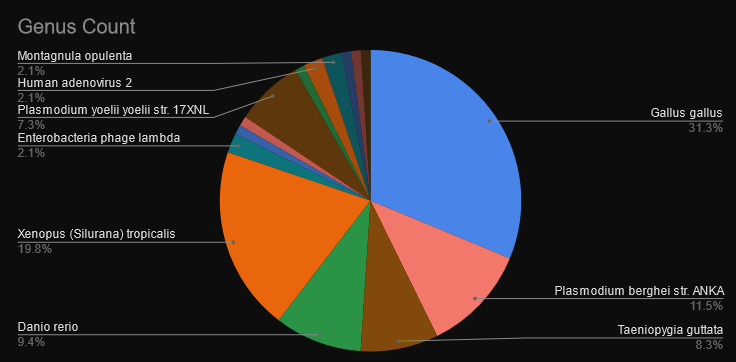

## Conclusions

After completion of the differential expression analysis and the foreign RNA detection we did not find any genes of interest or a target genus that may be carrying the infection.